In [1]:
# Import packages
import numpy as np
import utils
import matplotlib.pyplot as plt
import random

In [2]:
# Defining dataset
features = np.array([[1,0], [0,2], [1,1], [1,2], [1,3], [2,2], [2,3], [3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

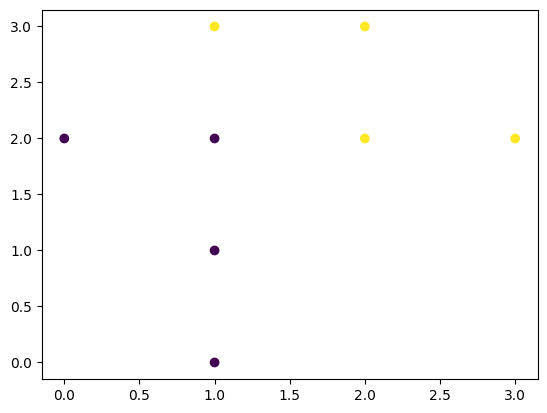

In [3]:
# Plotting dataset
plt.scatter(x=features[:, 0], y=features[:, 1], c=labels)
plt.show()

In [8]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features)+bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
    total_error=0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
        

In [5]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [12]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    plt.plot(range(epochs), errors)
    plt.show()
    return weights, bias

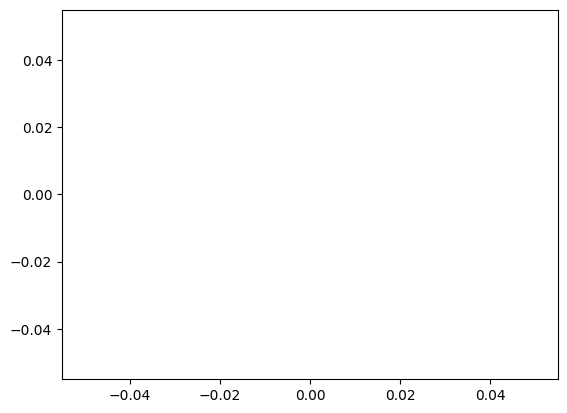

([0.8517803846176366, 0.3845595842452266], -1.5038288881715585)

In [13]:
logistic_regression_algorithm(features, labels)